In [54]:

DATA_FILE = "mc_data/mc_output2.csv" 

In [55]:
import pandas as pd
import numpy as np
from scipy import stats          # for linear regression
import matplotlib.pyplot as plt  # for plotting (no seaborn per spec)
import argparse
import pathlib
import sys
import seaborn as sns

# Load the data
df = pd.read_csv(DATA_FILE)
print(f"Loaded {len(df):,} rows from {DATA_FILE}")


Loaded 10,000 rows from mc_data/mc_output2.csv


In [56]:
# Descriptive statistics - for select features
# ─────────────────────────────────────────────
cols = ["mean_deflection_deg",
        "hit_ratio",
        "wake_intrusion_ratio",
        "radius",
        "curvature"]

print("\n========= Descriptive statistics (selected columns) =========")
display(df[cols].describe(percentiles=[.05, .25, .5, .75, .95]).round(3))



========= Descriptive statistics (selected columns) =========


,mean_deflection_deg,hit_ratio,wake_intrusion_ratio,radius,curvature
count,10000.000,10000.000,10000.000,10000.000,10000.000
mean,168.168,0.004,0.067,0.650,2.245
std,8.107,0.005,0.059,0.202,0.433
min,152.571,0.000,0.006,0.300,1.500
5%,154.927,0.000,0.009,0.335,1.574
25%,160.395,0.000,0.013,0.472,1.868
50%,173.026,0.004,0.019,0.653,2.246
75%,175.498,0.008,0.125,0.824,2.614
95%,177.380,0.012,0.163,0.967,2.922
max,178.222,0.017,0.185,1.000,3.000


[specular]  wake_intrusion_ratio = -0.00687 * mean_deflection_deg + 1.22713   (R² = 0.9933,  p = 0.00e+00)
[diffuse]  wake_intrusion_ratio = 0.00154 * mean_deflection_deg + -0.25689   (R² = 0.6819,  p = 0.00e+00)


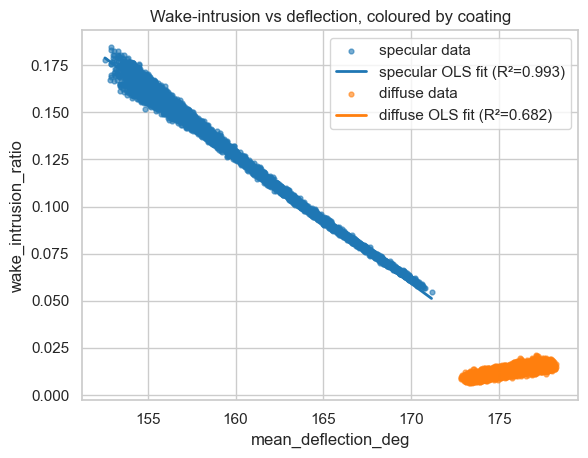

In [57]:
# Linear regression: wake_intrusion_ratio vs mean_deflection_deg
# combined scatter with separate fits for specular vs diffuse 
# ---------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

fig, ax = plt.subplots()

colors = {"specular": "tab:blue", "diffuse": "tab:orange"}
lines  = {}

for coat in ["specular", "diffuse"]:
    mask = df["coating_type"] == coat
    sub  = df.loc[mask]

    X = sub["mean_deflection_deg"].values
    Y = sub["wake_intrusion_ratio"].values

    slope, intercept, r, p, stderr = stats.linregress(X, Y)
    print(f"[{coat}]  wake_intrusion_ratio = {slope:.5f} * mean_deflection_deg + {intercept:.5f}   "
          f"(R² = {r**2:.4f},  p = {p:.2e})")

    # scatter
    ax.scatter(X, Y, s=12, alpha=0.6, color=colors[coat], label=f"{coat} data")

    # regression line
    x_fit = np.linspace(X.min(), X.max(), 200)
    line  = ax.plot(x_fit, intercept + slope * x_fit,
                    linewidth=2, color=colors[coat],
                    label=f"{coat} OLS fit (R²={r**2:.3f})")
    lines[coat] = line

ax.set_xlabel("mean_deflection_deg")
ax.set_ylabel("wake_intrusion_ratio")
ax.set_title("Wake-intrusion vs deflection, coloured by coating")
ax.legend()
plt.show()

[specular]  wake_intrusion_ratio = 0.15569 * radius + 0.02139   (R² = 0.9649,  p = 0.00e+00)
[diffuse]  wake_intrusion_ratio = -0.01080 * radius + 0.01970   (R² = 0.7478,  p = 0.00e+00)


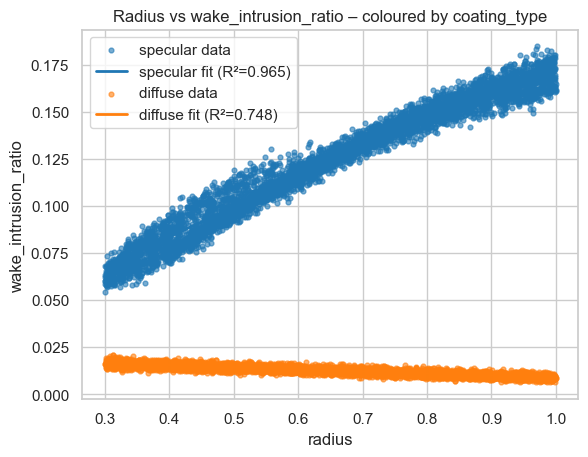

In [58]:
# Linear regression: wake_intrusion_ratio vs radius
# –– colour-coded by coating_type, with separate OLS fits ––
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

fig, ax = plt.subplots()

colors = {"specular": "tab:blue", "diffuse": "tab:orange"}

for coat in ["specular", "diffuse"]:
    sub = df.loc[df["coating_type"] == coat]

    X = sub["radius"].values
    Y = sub["wake_intrusion_ratio"].values

    slope, intercept, r, p, stderr = stats.linregress(X, Y)
    print(f"[{coat}]  wake_intrusion_ratio = {slope:.5f} * radius + {intercept:.5f}   "
          f"(R² = {r**2:.4f},  p = {p:.2e})")

    # scatter
    ax.scatter(X, Y, s=12, alpha=0.6, color=colors[coat], label=f"{coat} data")

    # regression line
    x_fit = np.linspace(X.min(), X.max(), 200)
    ax.plot(x_fit, intercept + slope * x_fit, linewidth=2,
            color=colors[coat], label=f"{coat} fit (R²={r**2:.3f})")

ax.set_xlabel("radius")
ax.set_ylabel("wake_intrusion_ratio")
ax.set_title("Radius vs wake_intrusion_ratio – coloured by coating_type")
ax.legend()
plt.show()


[specular]  mean_deflection_deg = -22.54800 * radius + 175.42338   (R² = 0.9617,  p = 0.00e+00)
[diffuse]  mean_deflection_deg = -6.55672 * radius + 179.76508   (R² = 0.9540,  p = 0.00e+00)


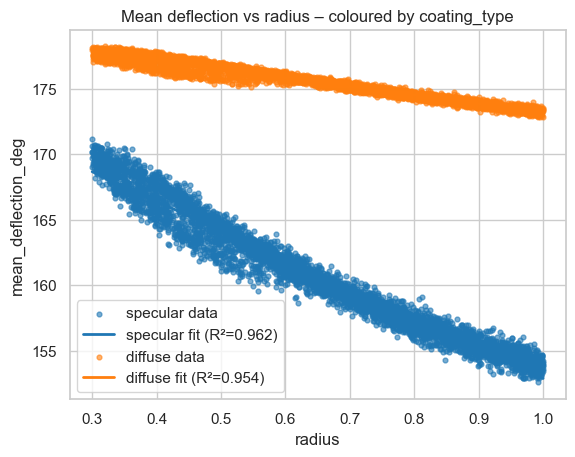

In [59]:
# Linear regression: mean_deflection_deg vs radius
# –– colour-coded by coating_type, each with its own OLS fit ––
# -------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

fig, ax = plt.subplots()

colors = {"specular": "tab:blue", "diffuse": "tab:orange"}

for coat in ["specular", "diffuse"]:
    sub = df.loc[df["coating_type"] == coat]

    X = sub["radius"].values
    Y = sub["mean_deflection_deg"].values

    slope, intercept, r, p, stderr = stats.linregress(X, Y)
    print(f"[{coat}]  mean_deflection_deg = {slope:.5f} * radius + {intercept:.5f}   "
          f"(R² = {r**2:.4f},  p = {p:.2e})")

    # scatter
    ax.scatter(X, Y, s=12, alpha=0.6, color=colors[coat], label=f"{coat} data")

    # regression line
    x_fit = np.linspace(X.min(), X.max(), 200)
    ax.plot(x_fit, intercept + slope * x_fit, linewidth=2,
            color=colors[coat], label=f"{coat} fit (R²={r**2:.3f})")

ax.set_xlabel("radius")
ax.set_ylabel("mean_deflection_deg")
ax.set_title("Mean deflection vs radius – coloured by coating_type")
ax.legend()
plt.show()

[specular]  wake_intrusion_ratio = -0.00454 * curvature + 0.13260   (R² = 0.0037,  p = 1.75e-05)
[diffuse]  wake_intrusion_ratio = -0.00015 * curvature + 0.01301   (R² = 0.0007,  p = 6.05e-02)


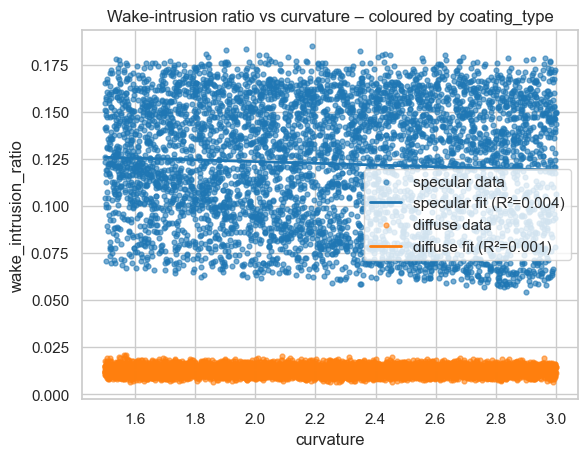

In [60]:
# Linear regression: wake_intrusion_ratio vs curvature
# –– colour-coded by coating_type, each with its own OLS fit ––
# -------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

fig, ax = plt.subplots()

colors = {"specular": "tab:blue", "diffuse": "tab:orange"}

for coat in ["specular", "diffuse"]:
    sub = df.loc[df["coating_type"] == coat]

    X = sub["curvature"].values
    Y = sub["wake_intrusion_ratio"].values

    slope, intercept, r, p, stderr = stats.linregress(X, Y)
    print(f"[{coat}]  wake_intrusion_ratio = {slope:.5f} * curvature + {intercept:.5f}   "
          f"(R² = {r**2:.4f},  p = {p:.2e})")

    # Scatter points
    ax.scatter(X, Y, s=12, alpha=0.6, color=colors[coat], label=f"{coat} data")

    # Regression line
    x_fit = np.linspace(X.min(), X.max(), 200)
    ax.plot(x_fit, intercept + slope * x_fit, linewidth=2,
            color=colors[coat], label=f"{coat} fit (R²={r**2:.3f})")

ax.set_xlabel("curvature")
ax.set_ylabel("wake_intrusion_ratio")
ax.set_title("Wake-intrusion ratio vs curvature – coloured by coating_type")
ax.legend()
plt.show()


In [61]:

# Helper / utility functions
# --------------------------------------------------

# describe the numerical columns
def describe(df: pd.DataFrame, num_cols) -> None:
    print("\n=== Descriptive statistics (numeric columns) ===")
    print(df[num_cols].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).round(3))


def correlation_matrix(df: pd.DataFrame, num_cols) -> pd.DataFrame:
    corr = df[num_cols].corr(method="pearson")
    print("\n========= Pearson correlation matrix (rho) =========")
    print(corr.round(3))

    # p-values (Pearson below diag, Spearman above)
    p_pearson  = df[num_cols].corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(len(num_cols))
    p_spearman = df[num_cols].corr(method=lambda x, y: stats.spearmanr(x, y)[1]) - np.eye(len(num_cols))
    p_vals = np.tril(p_pearson, k=-1) + np.triu(p_spearman, k=1)
    print("\n(p-values, lower -> Pearson  upper -> Spearman)")
    print(p_vals.round(3))

    # correlation matrix heat map
    plt.figure(figsize=(7, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f",
                linewidths=0.5, cbar_kws={"label": "rho"})
    plt.title("Parameter correlations")
    plt.tight_layout()
    return corr


def scatter(df, x, y, hue=None, **kw):
    """General scatter plot helper used in the original script"""
    sns.scatterplot(data=df, x=x, y=y, hue=hue, alpha=0.7, **kw)
    sns.regplot(data=df, x=x, y=y, scatter=False,
                color="k", ci=None, line_kws={"ls": "--"})

# rank best row based on hit_ratio and break ties with highest mean_deflection_degree and lowest wake_wafer_distance
def ranking_row(df) -> pd.Series:
    return df.sort_values(
        ["hit_ratio", "mean_deflection_deg", "wake_wafer_distance"],
        ascending=[True, False, True]
    ).iloc[0]



========= Describing the numeric data =========


=== Descriptive statistics (numeric columns) ===
          radius  curvature  thickness   z_offset  xy_offset_x  xy_offset_y  \
count  10000.000  10000.000  10000.000  10000.000    10000.000    10000.000   
mean       0.650      2.245      2.248     -0.150       -0.000       -0.000   
std        0.202      0.433      0.432      0.029        0.029        0.029   
min        0.300      1.500      1.500     -0.200       -0.050       -0.050   
5%         0.335      1.574      1.577     -0.195       -0.045       -0.045   
25%        0.472      1.868      1.871     -0.175       -0.025       -0.025   
50%        0.653      2.246      2.246     -0.151       -0.001       -0.000   
75%        0.824      2.614      2.619     -0.125        0.025        0.025   
95%        0.967      2.922      2.924     -0.105        0.045        0.045   
max        1.000      3.000      3.000     -0.100        0.050        0.050   

            mass  mean_deflect

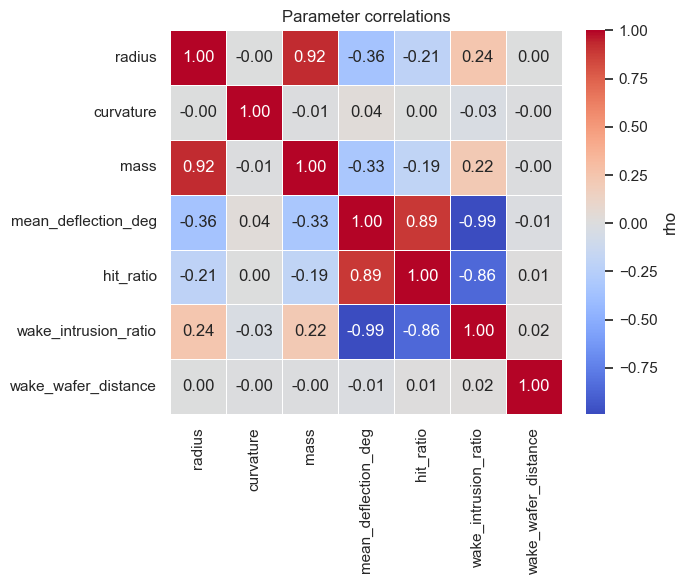

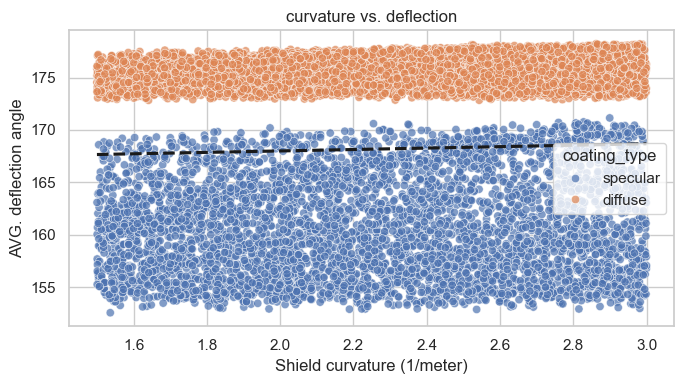

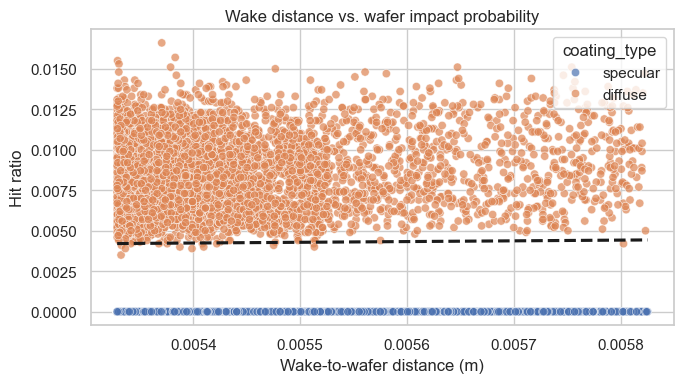

In [ ]:
# --------------------------------------------------
# Main analysis logic (minimally modified for notebooks)
# --------------------------------------------------

def main(argv=None):
    # --- analysis steps (identical) ---
    numeric_cols = df.select_dtypes(include=np.number).columns
    cols = ["radius", "curvature", "mass",
        "mean_deflection_deg", "hit_ratio",
        "wake_intrusion_ratio", "wake_wafer_distance"]

    numeric_subset = df[cols]
    
    print(f"\n========= Describing the numeric data =========\n")
    describe(df, numeric_cols)
    corr = correlation_matrix(df, cols)

    for col in ["hit_ratio", "wake_wafer_distance"]:
        if col in df.columns and df[col].nunique() == 1:
            print(f"WARNING: {col} is constant ({df[col].iloc[0]}) - correlations are not meaningful.")

    sns.set_theme(style="whitegrid")

    # curvature → deflection
    plt.figure(figsize=(7, 4))
    scatter(df, "curvature", "mean_deflection_deg", hue="coating_type")
    plt.xlabel("Shield curvature (1/meter)")
    plt.ylabel("AVG. deflection angle")
    plt.title("curvature vs. deflection")
    plt.tight_layout()

    # wake distance → hit‑ratio
    plt.figure(figsize=(7, 4))
    scatter(df, "wake_wafer_distance", "hit_ratio", hue="coating_type")
    plt.xlabel("Wake-to-wafer distance (m)")
    plt.ylabel("Hit ratio")
    plt.title("Wake distance vs. wafer impact probability")
    plt.tight_layout()

    # design hints
    best_row = ranking_row(df)
    best_coating = df.groupby("coating_type")["mean_deflection_deg"].mean().idxmax()

    print("\n=== Guiding conclusions ===")
    print(f"Coating with highest *mean* deflection: {best_coating}")
    print(f"rho(curvature, deflection) : {corr.loc['curvature', 'mean_deflection_deg']:+.2f}")
    print(f"rho(radius, deflection)    : {corr.loc['radius', 'mean_deflection_deg']:+.2f}")
    print(f"rho(wake_dist, hit_ratio)  : {corr.loc['wake_wafer_distance', 'hit_ratio']:+.2f}")

    print("\n🏆 Top performer (min hit_ratio → max deflection → min wake_dist)")
    print(f"    radius              = {best_row['radius']:.3f} m")
    print(f"    curvature           = {best_row['curvature']:.2f} 1/m")
    print(f"    wake-wafer distance = {best_row['wake_wafer_distance']:.3f} m")
    print(f"    coating             = {best_row['coating_type']}")
    print(f"    deflection          = {best_row['mean_deflection_deg']:.2f} °")
    print(f"    hit_ratio           = {best_row['hit_ratio']:.4f}")
        
main()

